In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [9]:
model.fit(x_train.astype(np.float32),y_train.astype(np.float32),epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 84s 55ms/step - loss: 1.2909 - accuracy: 0.8467 - val_loss: 0.3391 - val_accuracy: 0.8827
Epoch 2/5
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2829 - accuracy: 0.8994 - val_loss: 0.3032 - val_accuracy: 0.8939
Epoch 3/5
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2465 - accuracy: 0.9103 - val_loss: 0.3224 - val_accuracy: 0.8896
Epoch 4/5
1500/1500 [==============================] - 74s 49ms/step - loss: 0.2235 - accuracy: 0.9182 - val_loss: 0.3058 - val_accuracy: 0.8985
Epoch 5/5
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2036 - accuracy: 0.9243 - val_loss: 0.3615 - val_accuracy: 0.8851


In [10]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.3811 - accuracy: 0.8778


In [11]:
print(loss)

0.3811206817626953


In [12]:
print(accuracy*100)

87.77999877929688


9


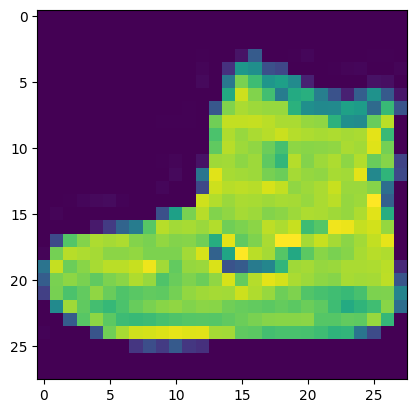

0


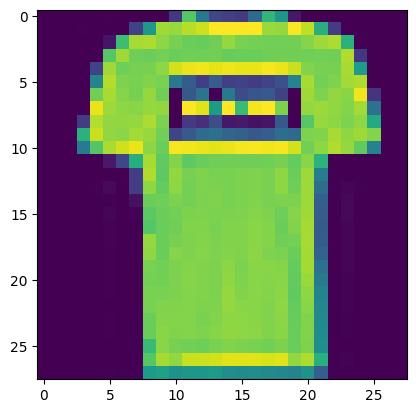

3


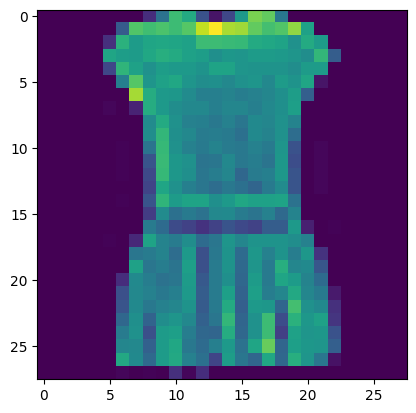

2


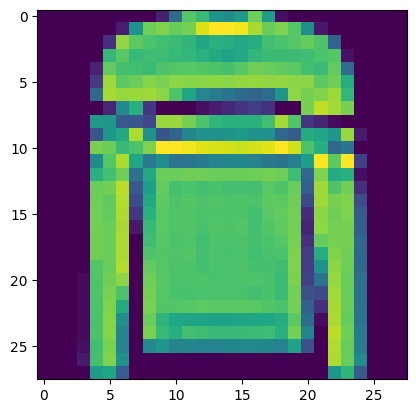

7


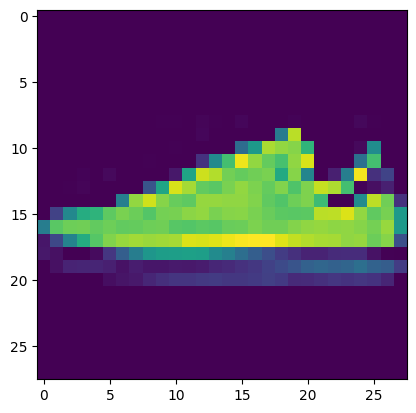

5


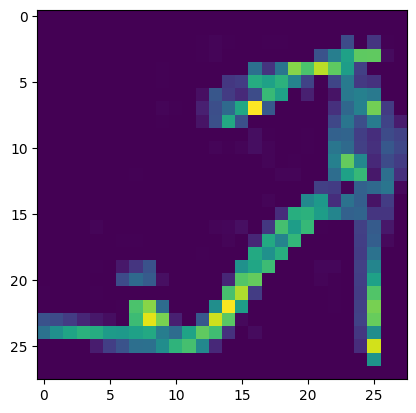

1


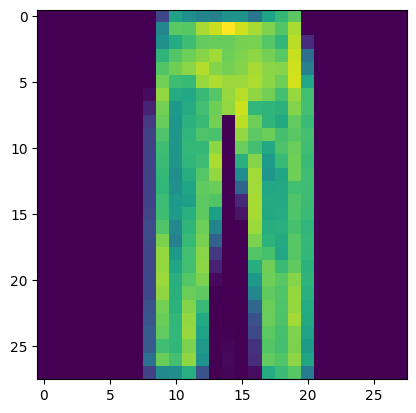

6


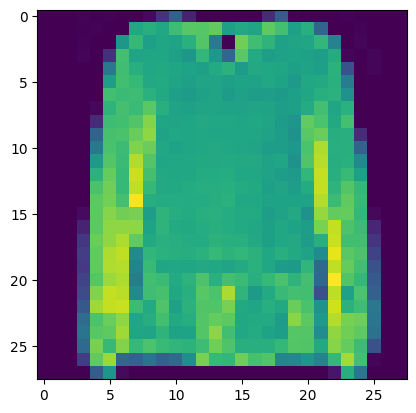

4


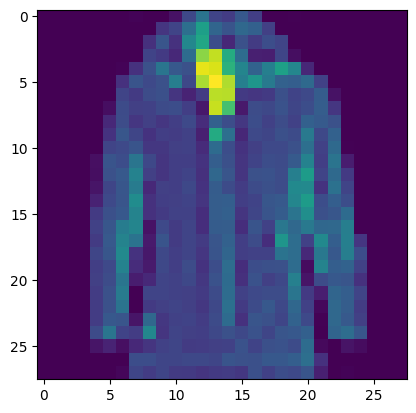

8


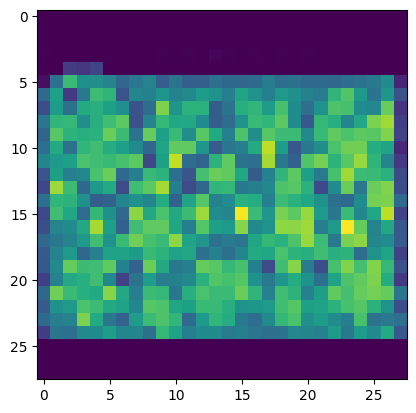

In [13]:
labels=[]
i=0

while(len(labels)<10):
    label=y_train[i]
    if label not in labels:
        plt.imshow(x_train[i])
        print(label)
        plt.show()
        labels.append(label)
    i+=1

In [14]:
print(labels)

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]


1/1 [==============================] - 0s 58ms/step
8


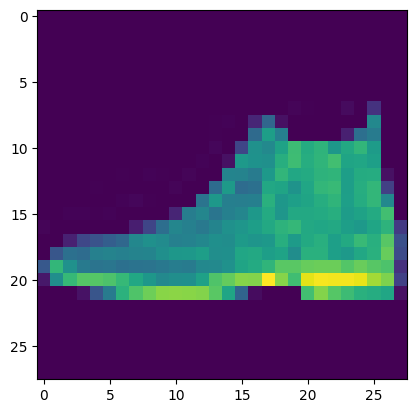

In [17]:
predictions = model.predict(x_test[0:1])
label = labels[np.argmax(predictions)]
print(label)
plt.imshow(x_test[0])
plt.show()

In [23]:
def predict(id_):
    predictions = model.predict(x_test[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(x_test[id_])
    plt.show()

1/1 [==============================] - 0s 63ms/step
0


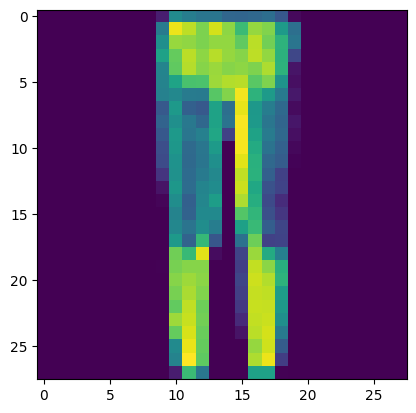

In [27]:
predict(3)

In [35]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(x_test[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(x_test[id_])
    plt.show()

1/1 [==============================] - 0s 60ms/step
ankle_boots


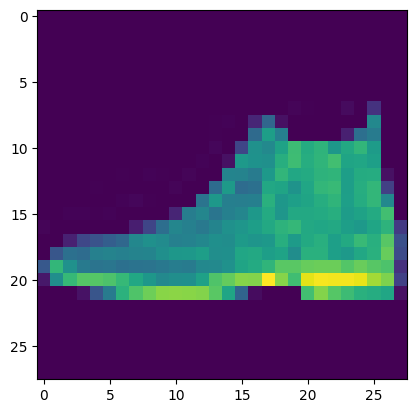

In [36]:
predict(0)

1/1 [==============================] - 0s 59ms/step
pullover


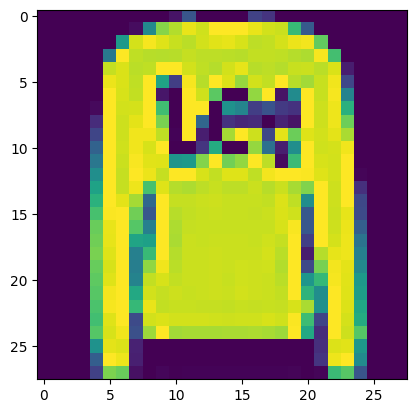

In [37]:
predict(1)

1/1 [==============================] - 0s 62ms/step
coat


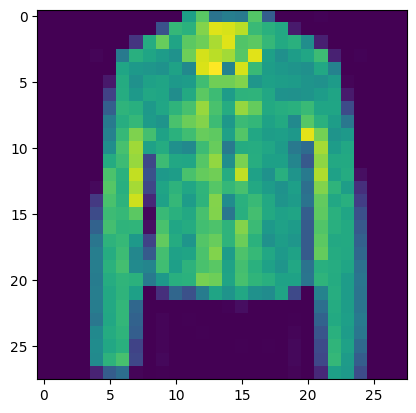

In [38]:
predict(10)

1/1 [==============================] - 0s 58ms/step
sandal


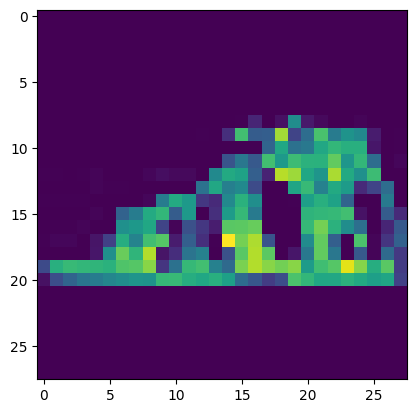

In [39]:
predict(11)

1/1 [==============================] - 0s 61ms/step
trouser


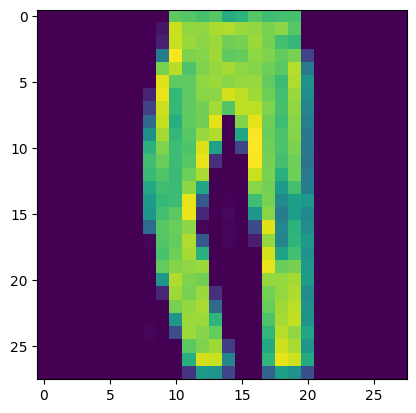

In [40]:
predict(5)